# Linear Regression

In [13]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### Generate dataset

In [14]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [15]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.4660, 2.1536]) 
label: tensor([-2.1655])


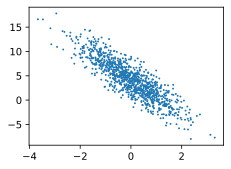

In [16]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

### Read dataset

In [17]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [18]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2231,  0.5162],
        [-0.1138, -1.5953],
        [-1.0759, -0.2274],
        [-0.0466, -0.8731],
        [-1.6280,  0.2420],
        [-0.4088,  1.0601],
        [-0.4372, -0.8615],
        [ 1.3106, -0.5098],
        [-0.6324, -1.7024],
        [ 0.4219, -0.2737]]) 
 tensor([[ 2.8874],
        [ 9.3772],
        [ 2.8158],
        [ 7.0699],
        [ 0.1292],
        [-0.2139],
        [ 6.2574],
        [ 8.5505],
        [ 8.7268],
        [ 5.9691]])


### Initialize model parameters

In [19]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### Define model

In [20]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### Define the loss function

In [21]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### Define optimization algorithm

In [22]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Training

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033895
epoch 2, loss 0.000127
epoch 3, loss 0.000049


In [24]:
print(f'Estimated error of w: {true_w - w.reshape(true_w.shape)}')
print(f'Estimated error of b: {true_b - b}')

Estimated error of w: tensor([ 0.0010, -0.0009], grad_fn=<SubBackward0>)
Estimated error of b: tensor([7.7248e-05], grad_fn=<RsubBackward1>)
